## Reset env - import/install package

In [1]:
# clear all elements from environment
rm(list=ls())      #will clear all objects includes hidden objects.
gc(reset = TRUE)   #free up memrory and report the memory usage.

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,595856,31.9,1271675,68,595856,31.9
Vcells,1066817,8.2,8388608,64,1066817,8.2


In [2]:
# sources from which this notebook was build:
#   R Packages Vignettes: 
#     https://bioconductor.org/help/course-materials/2015/BioC2015/
#     https://bioconductor.org/packages/release/bioc/html/minfi.html
#     https://bioconductor.org/packages/release/workflows/html/methylationArrayAnalysis.html
#   Others:
#     https://vbaliga.github.io/verify-that-r-packages-are-installed-and-loaded/

packages = c("BiocManager", "limma", "minfi", "ggplot2", "ggrepel", "RColorBrewer") 

    package.check <- lapply(
        packages,
        FUN = function(x) {
            if (!require(x, character.only = TRUE)) {
                install.packages(x, dependencies = TRUE)
                library(x, character.only = TRUE)
            }
        }
    )


BiocManager::install("FlowSorted.Blood.450k")

#install.packages("ggalt", repos=c("http://rstudio.org/_packages","http://cran.rstudio.com",dependencies=TRUE))
#install.packages("ggrastr", repos=c("http://rstudio.org/_packages","http://cran.rstudio.com",dependencies=TRUE))

Loading required package: BiocManager

Warning message:
"package 'BiocManager' was built under R version 4.2.0"
Bioconductor version '3.14' is out-of-date; the current release version '3.15'
  is available with R version '4.2'; see https://bioconductor.org/install

Loading required package: limma

Loading required package: minfi

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following object is masked from 'package:limma':

    plotMA


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, 

## Load RAW*.RData 

In [3]:
# CHARGE and Kabuki: GSE97362
# Sotos : GSE74432

GEO <- 'GSE97362'

In [4]:
load(file.path(  parse(text=paste('RAW_',GEO,'_RGset_metadata.RData',sep='')) ))

RGset
metadata$geo <- as.character(rep(GEO, nrow(metadata)))

head(metadata, 5)

class: RGChannelSet 
dim: 622399 234 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

,geo_accession,disease_state,gender,disease_id,age_cat,age,geo
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
GSM2562699,GSM2562699,CHARGE,female,CHD7,child,4,GSE97362
GSM2562700,GSM2562700,CHARGE,male,CHD7,child,6,GSE97362
GSM2562701,GSM2562701,CHARGE,female,CHD7,child,14,GSE97362
GSM2562702,GSM2562702,CHARGE,male,CHD7,child,13,GSE97362
GSM2562703,GSM2562703,CHARGE,male,CHD7,youth,18,GSE97362


In [5]:
preprocessRaw(RGset)

Loading required package: IlluminaHumanMethylation450kmanifest



class: MethylSet 
dim: 485512 234 
metadata(0):
assays(2): Meth Unmeth
rownames(485512): cg00050873 cg00212031 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.40.0
  Manifest version: 0.4.0

## Figures buffer (for PDF file)

In [6]:
fig_buffer = list()
fig_id = 1

## Preproccessing

### Samples Filtering

#### Density plot

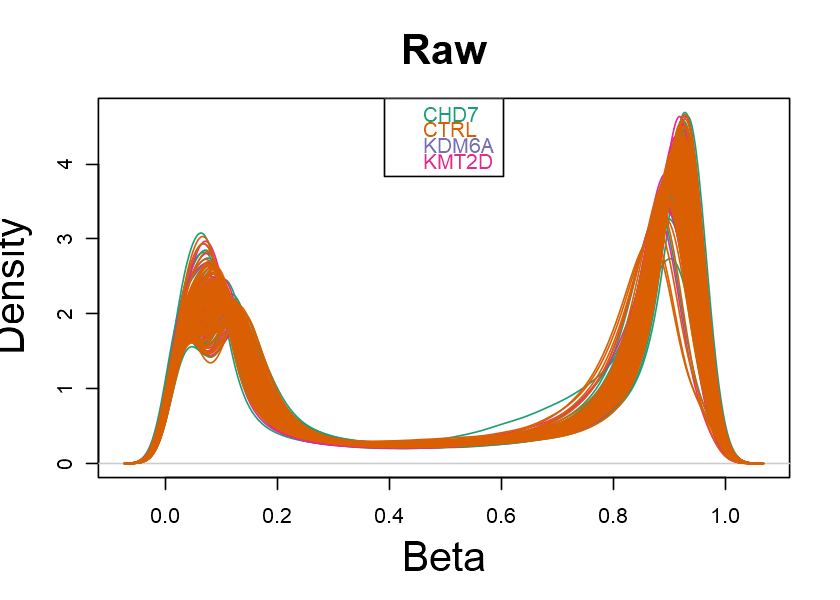

In [7]:
library(RColorBrewer)
options(repr.plot.width=7, repr.plot.height=5)

densityPlot(  getBeta(RGset, type="Illumina", betaThreshold=0.001) 
            , sampGroups=metadata$disease_id,main="Raw", legend=FALSE,cex.lab = 2,
     cex.axis = 1,
     cex.main = 2)
legend("top", legend = levels(factor(metadata$disease_id)),  text.col=brewer.pal(8,"Dark2"))

# bean plot
#densityBeanPlot(beta_val, sampGroups=metadata$disease_id)

#### QC plot  and mean detection p-value

mean median M:  11.7875 
mean median U:  10.83082 


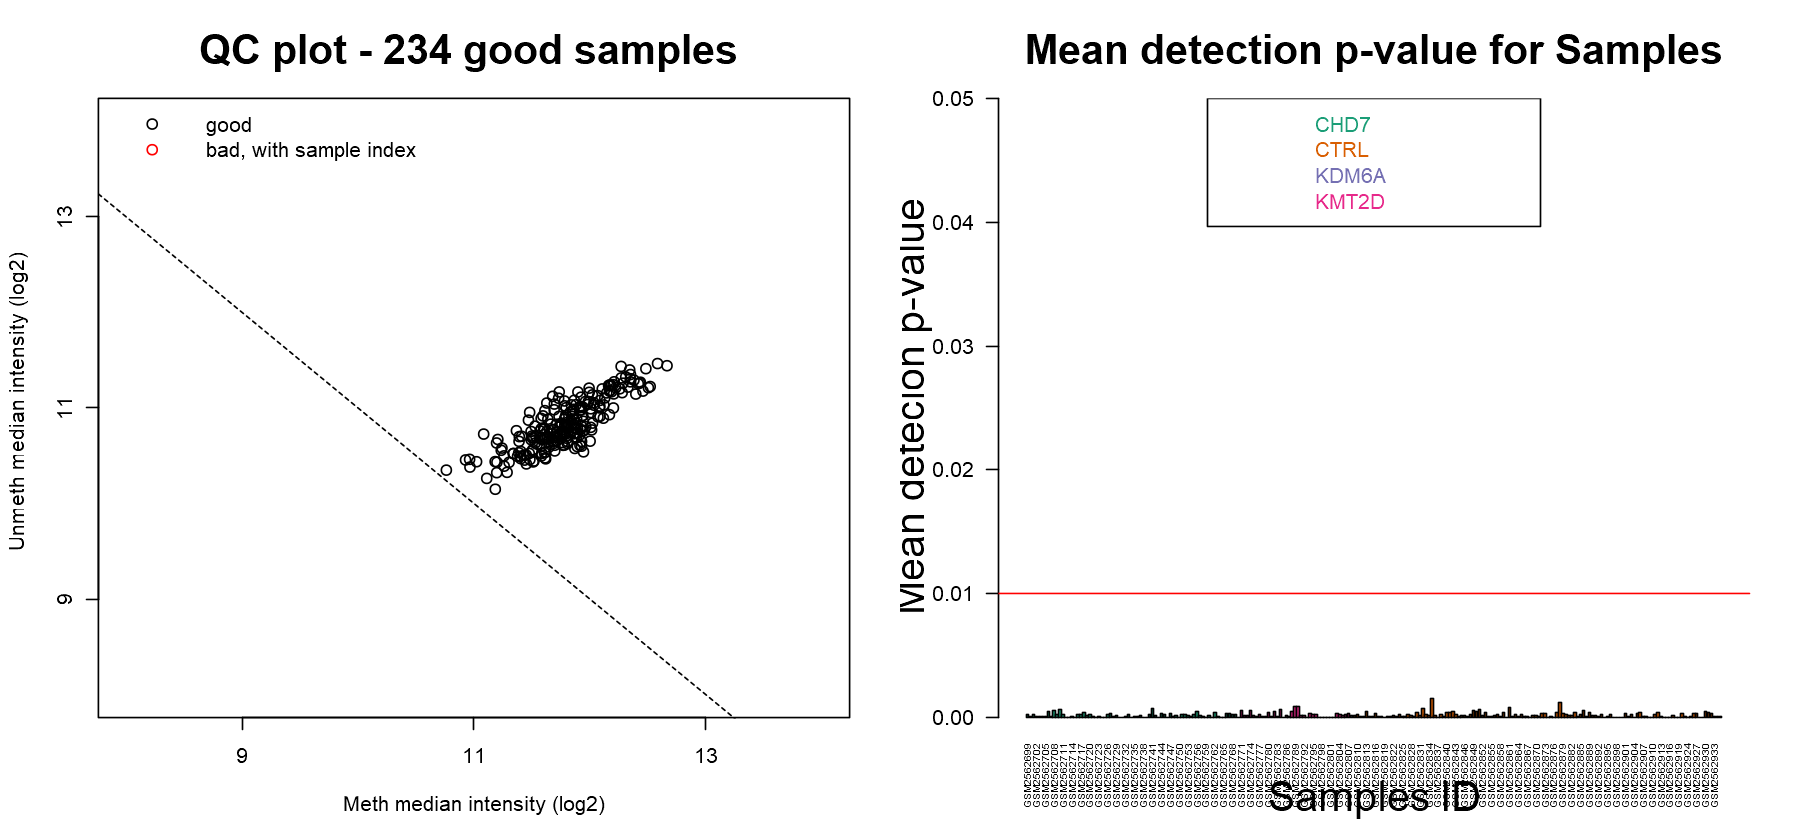

In [8]:
######################################
## QC 
######################################
QC <- getQC(preprocessRaw(RGset))
mMed_mean <- mean(data.frame(QC)[,1])
uMed_mean <- mean(data.frame(QC)[,2])

cat('mean median M: ', mMed_mean, '\n')
cat('mean median U: ', uMed_mean, '\n')

######################################
## mean detP - look at the mean detection P-values across all samples to identify any failed samples
######################################
detP <- detectionP(RGset)


######################################
options(repr.plot.width=15, repr.plot.height=7)
par(mfrow = c(1, 2))

pal <- brewer.pal(8,"Dark2")

plotQC(QC)
title(main = paste("QC plot - ", nrow(QC)," good samples ", sep="") ,cex.lab = 2,
     cex.axis = 1,
     cex.main = 2)

barplot(colMeans(detP), xlab = "Samples ID", ylab = "Mean detecion p-value", col=pal[factor(metadata$disease_id)],
        las=2,cex.names=0.45,ylim=c(0,0.05), main="Mean detection p-value for Samples",cex.lab = 2,
     cex.axis = 1,
     cex.main = 2)

abline(h=0.01,col="red")
legend("top", legend = levels(factor(metadata$disease_id)),  text.col=pal)

fig_buffer[[fig_id]] <-  recordPlot()
fig_id = fig_id + 1

### Probes filtering 


#### detection p-value

In [9]:
gc(reset = TRUE)  

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10673988,570.1,18038067,963.4,10673988,570.1
Vcells,286551051,2186.3,822010713,6271.5,286551051,2186.3


In [10]:
probes_rm.detP <- (rowSums(detP > 0.01) / ncol(detP)) > 0.05
table(probes_rm.detP)


probes_rm.detP
 FALSE   TRUE 
484561    951 

In [11]:
RGset <- subsetByLoci(RGset, excludeLoci = rownames(detP[probes_rm.detP, ]))
RGset

class: RGChannelSet 
dim: 620749 234 
metadata(0):
assays(2): Green Red
rownames(620749): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

#### Remove of cross-react probes

In [12]:
probes_rem.xreact <- read.csv(file="./48639-non-specific-probes-Illumina450k.csv", stringsAsFactors=FALSE)$TargetID
table(probes_rem.xreact %in% c())

RGset <- subsetByLoci(RGset, excludeLoci = probes_rem.xreact)
RGset


FALSE 
29233 

class: RGChannelSet 
dim: 580209 234 
metadata(0):
assays(2): Green Red
rownames(580209): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(0):
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

### Blood Cells Estimation

In [13]:
# we just clean the env. and make place in RAMs
rm(list=c('detP', 'QC')) 
gc(reset = TRUE)  

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10677195,570.3,18038067,963.4,10677195,570.3
Vcells,163221204,1245.3,657608571,5017.2,163221204,1245.3


In [14]:
cells_counts <- estimateCellCounts(RGset, compositeCellType = "Blood", processMethod = "auto", returnAll = F, meanPlot = F)
metadata <- cbind(metadata, cells_counts[metadata$geo_accession,])

Loading required package: FlowSorted.Blood.450k

[estimateCellCounts] Combining user data with reference (flow sorted) data.


Warning message in DataFrame(sampleNames = c(colnames(rgSet), colnames(referenceRGset)), :
"'stringsAsFactors' is ignored"
[estimateCellCounts] Processing user and reference data together.


[preprocessQuantile] Mapping to genome.

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19

[preprocessQuantile] Fixing outliers.

[preprocessQuantile] Quantile normalizing.

[estimateCellCounts] Picking probes for composition estimation.


[estimateCellCounts] Estimating composition.




In [15]:
colnames(metadata)
rm(list=c('cells_counts'))
gc(reset = TRUE)  

[1] "geo_accession" "disease_state" "gender"        "disease_id"   
 [5] "age_cat"       "age"           "geo"           "CD8T"         
 [9] "CD4T"          "NK"            "Bcell"         "Mono"         
[13] "Gran"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11388402,608.3,18038067,963.4,11388402,608.3
Vcells,254275628,1940.0,1370565485,10456.6,254275628,1940.0


### Normalization

In [16]:
GMset_norma <- preprocessFunnorm(RGset, ratioConvert=FALSE)
GMset_norma

[preprocessFunnorm] Background and dye bias correction with noob

[preprocessFunnorm] Mapping to genome

[preprocessFunnorm] Quantile extraction

[preprocessFunnorm] Normalization



class: GenomicMethylSet 
dim: 455432 234 
metadata(0):
assays(2): Meth Unmeth
rownames(455432): cg13869341 cg24669183 ... cg25640065 cg16552926
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(3): xMed yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: NA
  minfi version: NA
  Manifest version: NA

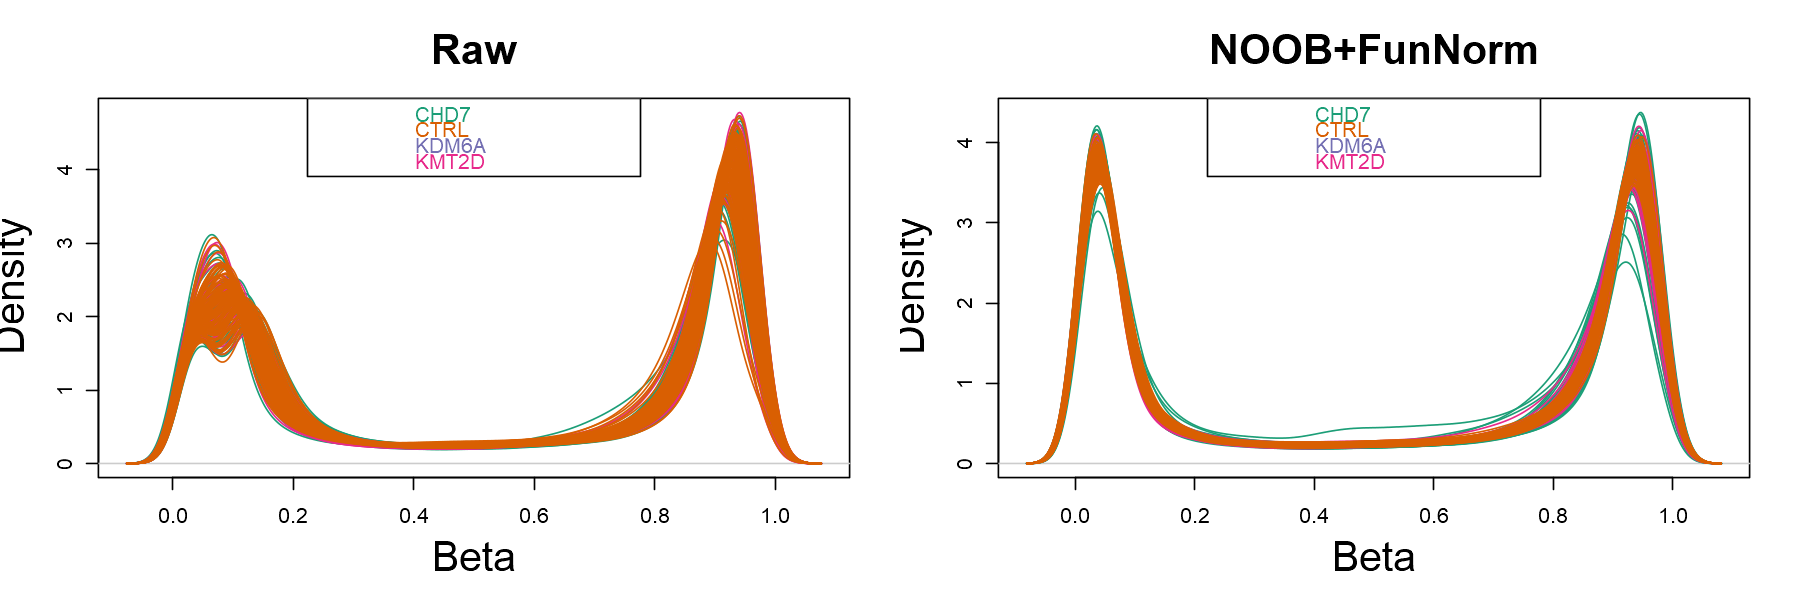

In [17]:
# Density plot before and after normalization

options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))

densityPlot(getBeta(RGset), sampGroups=metadata$disease_id,main="Raw", legend=FALSE, cex = 2, cex.lab = 2,
     cex.axis = 1,
     cex.main = 2)
legend("top", legend = levels(factor(metadata$disease_id)),  text.col=brewer.pal(8,"Dark2"))

densityPlot(getBeta(GMset_norma), sampGroups=metadata$disease_id,main="NOOB+FunNorm", legend=FALSE, cex = 2,cex.lab = 2,
     cex.axis = 1,
     cex.main = 2)
legend("top", legend = levels(factor(metadata$disease_id)),  text.col=brewer.pal(8,"Dark2"))


fig_buffer[[fig_id]] <-  recordPlot()
fig_id = fig_id + 1

 ### Remove SNPs probes

In [18]:
GMset_norma <- dropLociWithSnps(GMset_norma, snps=c("SBE","CpG"), maf=0)
GMset_norma

class: GenomicMethylSet 
dim: 439935 234 
metadata(0):
assays(2): Meth Unmeth
rownames(439935): cg13869341 cg24669183 ... cg25640065 cg16552926
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(3): xMed yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: NA
  minfi version: NA
  Manifest version: NA

### Predict Sex (see if there is bad labels)

In [19]:
pred_gender <- getSex(GMset_norma)
pred_gender <- pred_gender[metadata$geo_accession,]
pred_gender
#########################################
metadata$gender <- gsub('female', 'F', metadata$gender )
metadata$gender <- gsub('male', 'M', metadata$gender)

DataFrame with 234 rows and 3 columns
                xMed      yMed predictedSex
           <numeric> <numeric>  <character>
GSM2562699   13.0528    8.7972            F
GSM2562700   12.3211   12.7514            M
GSM2562701   13.0967    8.8043            F
GSM2562702   12.4378   12.7578            M
GSM2562703   12.5687   12.7881            M
...              ...       ...          ...
GSM2562931   12.4987   12.8018            M
GSM2562932   12.5251   12.7213            M
GSM2562933   12.5556   12.7260            M
GSM2562934   12.5993   12.7618            M
GSM2562935   12.5694   12.7409            M

In [20]:
gender_bad <- which( !(metadata$gender == pred_gender$predictedSex)) 
table(gender_bad)

cbind(metadata[gender_bad, c('disease_id', 'gender')], data.frame(pred_gender[gender_bad, ]))
#########################################
metadata[gender_bad, ]$gender <- pred_gender[gender_bad, ]$predictedSex

gender_bad
142 143 162 163 
  1   1   1   1 

,disease_id,gender,xMed,yMed,predictedSex
,<chr>,<chr>,<dbl>,<dbl>,<chr>
GSM2562840,CTRL,F,12.48018,12.682497,M
GSM2562841,CTRL,M,13.16489,8.788636,F
GSM2562860,CTRL,F,12.42606,12.732052,M
GSM2562861,CTRL,M,13.09112,8.901581,F


In [21]:
beta_withXY <- getBeta(GMset_norma[, metadata$geo_accession], type="Illumina")

### Remove probes on X & Y chromosomes

In [22]:
anno <- as.data.frame(getAnnotation(RGset)[c('Name','chr')])
probes_rm.chr <- anno$chr == 'chrX' | anno$chr == 'chrY'

table(probes_rm.chr)

GMset_norma <- GMset_norma[!rownames(GMset_norma) %in% anno[probes_rm.chr,]$Name,]
GMset_norma


probes_rm.chr
 FALSE   TRUE 
473864  11648 

class: GenomicMethylSet 
dim: 429649 234 
metadata(0):
assays(2): Meth Unmeth
rownames(429649): cg13869341 cg24669183 ... cg19565306 cg09226288
rowData names(0):
colnames(234): GSM2562699 GSM2562700 ... GSM2562934 GSM2562935
colData names(3): xMed yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: NA
  minfi version: NA
  Manifest version: NA

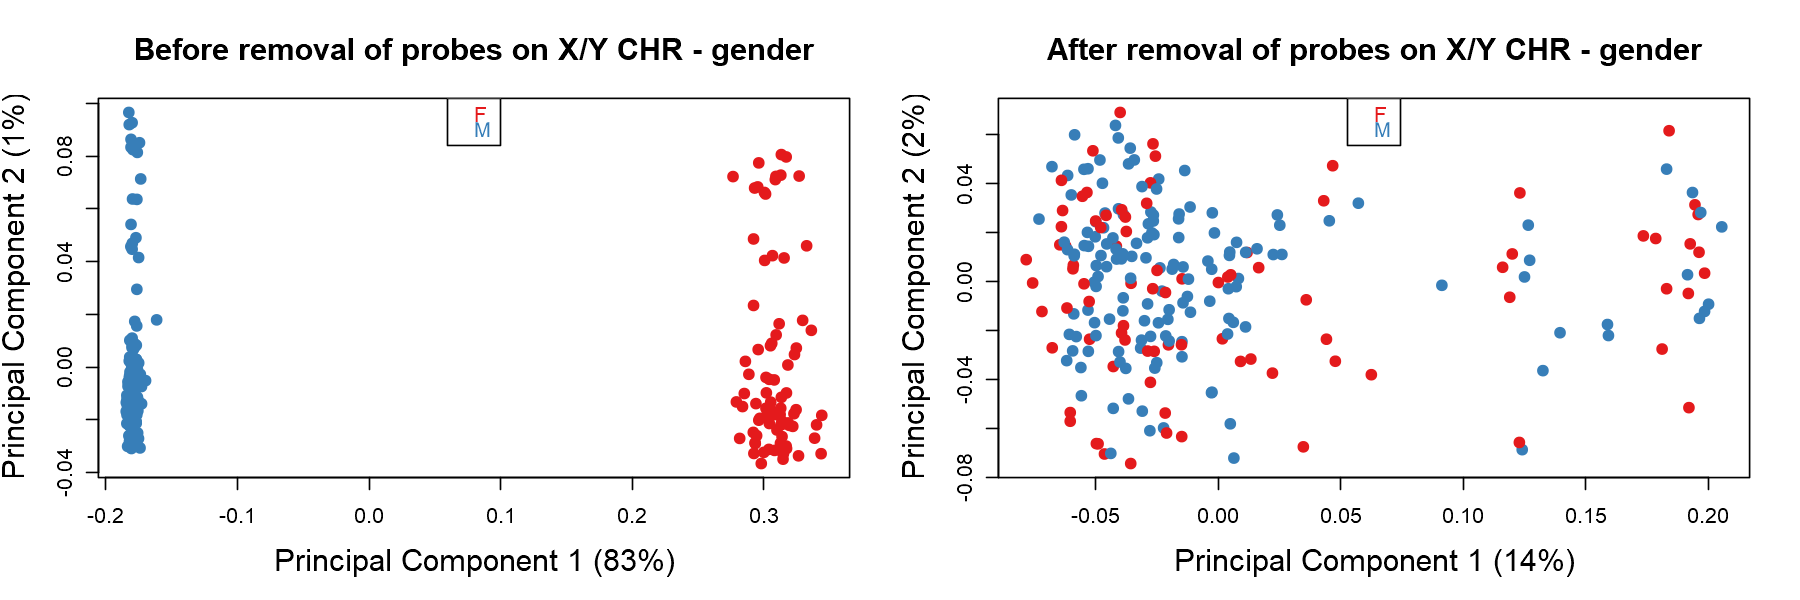

In [23]:
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))

pal  <- brewer.pal(8,"Set1")
factors_meta <- factor(metadata$gender)

plotMDS(beta_withXY,main="Before removal of probes on X/Y CHR - gender" , top=1000, gene.selection="common", col=pal[factors_meta], cex=1,  labels = NULL, pch = 19, cex.lab = 1.5,
     cex.axis = 1,
     cex.main = 1.5)
legend("top", legend = levels(factors_meta),  text.col=pal,  x.intersp=-0.5, text.width=0)

plotMDS(getBeta(GMset_norma[, metadata$geo_accession], type="Illumina"), main="After removal of probes on X/Y CHR - gender" , top=1000, gene.selection="common", col=pal[factors_meta], cex=1,  labels = NULL, pch = 19,
       cex.lab = 1.5,
     cex.axis = 1,
     cex.main = 1.5)
legend("top", legend = levels(factors_meta),  text.col=pal, x.intersp=-0.5, text.width=0)


fig_buffer[[fig_id]] <-  recordPlot()
fig_id = fig_id + 1

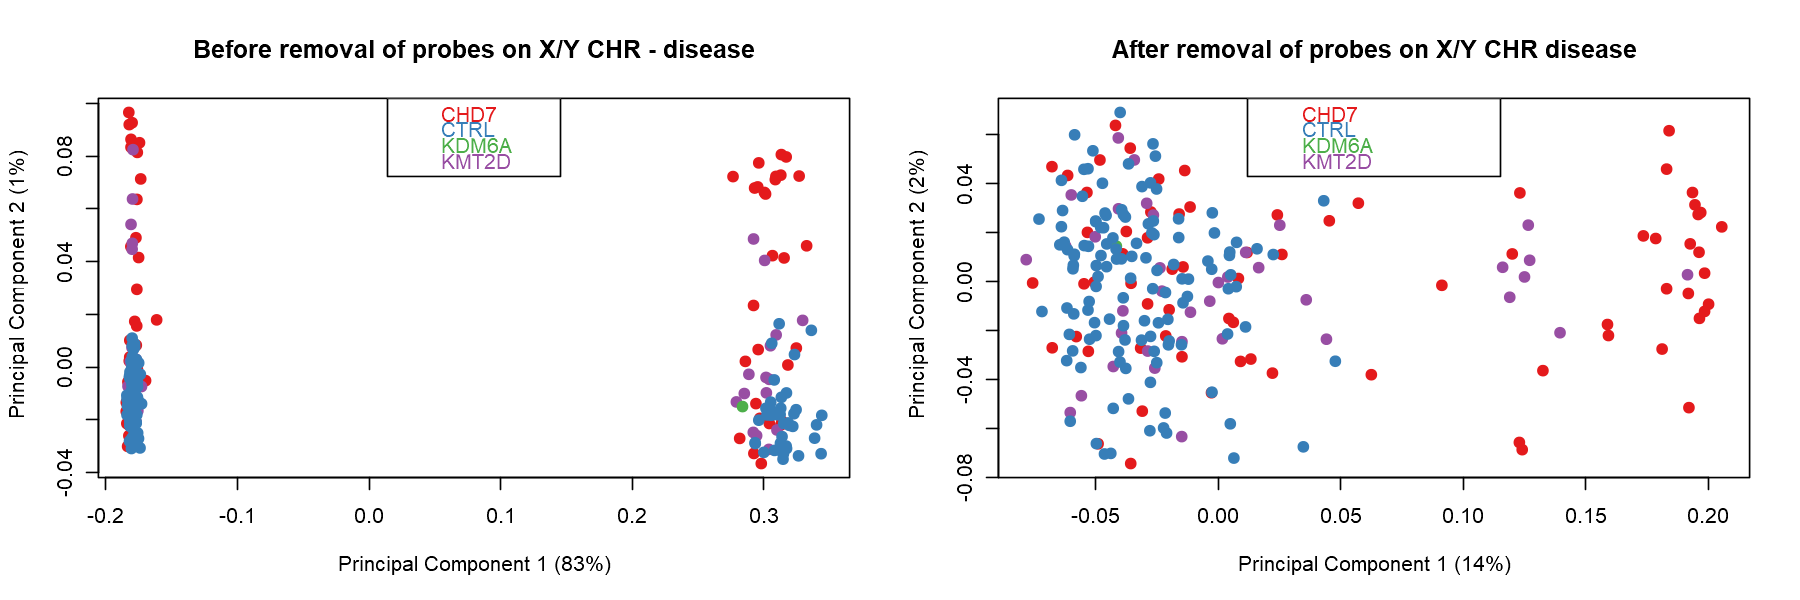

In [24]:
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))

pal  <- brewer.pal(8,"Set1")
factors_meta <- factor(metadata$disease_id)

plotMDS(beta_withXY,main="Before removal of probes on X/Y CHR - disease" , top=1000, gene.selection="common", col=pal[factors_meta], cex=1,  labels = NULL, pch = 19)
legend("top", legend = levels(factors_meta),  text.col=pal,  x.intersp=0, text.width=0.07)

plotMDS(getBeta(GMset_norma[, metadata$geo_accession], type="Illumina"), main="After removal of probes on X/Y CHR disease" , top=1000, gene.selection="common", col=pal[factors_meta], cex=1,  labels = NULL, pch = 19)
legend("top", legend = levels(factors_meta),  text.col=pal, x.intersp=0, text.width=0.07)

fig_buffer[[fig_id]] <-  recordPlot()
fig_id = fig_id + 1


In [25]:
save(GMset_norma,metadata,file=file.path( parse(text=paste('CLEAN_',GEO,'_GMset_metadata.RData',sep='')) ))  

In [26]:
save(RGset,metadata,file=file.path( parse(text=paste('CLEAN_',GEO,'_RGset_metadata.RData',sep='')) ))  

In [27]:
pdf(file= file.path(parse(text=paste(GEO,'_figures.pdf',sep=''))) , width=15, height=7)
for (fig in fig_buffer) {
    replayPlot(fig)
}
graphics.off()

---

In [28]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22000)

Matrix products: default

locale:
[1] LC_COLLATE=English_Belgium.1252  LC_CTYPE=English_Belgium.1252   
[3] LC_MONETARY=English_Belgium.1252 LC_NUMERIC=C                    
[5] LC_TIME=English_Belgium.1252    

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] IlluminaHumanMethylation450kanno.ilmn12.hg19_0.6.0
 [2] FlowSorted.Blood.450k_1.32.0                      
 [3] IlluminaHumanMethylation450kmanifest_0.4.0        
 [4] RColorBrewer_1.1-3                                
 [5] ggrepel_0.9.1                                     
 [6] ggplot2_3.3.6                                     
 [7] minfi_1.40.0                                      
 [8] bumphunter_1.36.0                                 
 [9] locfit_1.5-9.4                                    
[10] iterators_1.0.1